# IMPORTING THE LIBRARIES

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-11-15 10:06:57.838785: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-15 10:06:57.840587: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-15 10:06:57.865972: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 10:06:57.866007: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 10:06:57.866022: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

# LOADING THE DATA

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

# DATA PREPROCESSING

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train, x_test = x_train/255, x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
import matplotlib.pyplot as plt

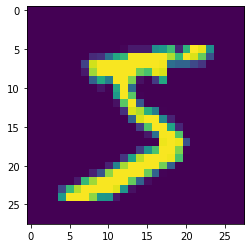

In [10]:
plt.figure()
plt.imshow(x_train[0])

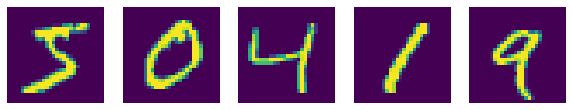

In [11]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')

plt.show()

In [13]:
num_classes = len(set(y_train.flatten()))
num_classes

10

# Define the network architecture using Keras 

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=num_classes, activation='softmax')
])

In [15]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=11)

Epoch 1/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7280 - accuracy: 0.7991 - val_loss: 0.3628 - val_accuracy: 0.9038
Epoch 2/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3818 - accuracy: 0.8898 - val_loss: 0.2917 - val_accuracy: 0.9183
Epoch 3/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3226 - accuracy: 0.9076 - val_loss: 0.2542 - val_accuracy: 0.9278
Epoch 4/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2852 - accuracy: 0.9187 - val_loss: 0.2276 - val_accuracy: 0.9354
Epoch 5/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2590 - accuracy: 0.9266 - val_loss: 0.2078 - val_accuracy: 0.9416
Epoch 6/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2373 - accuracy: 0.9333 - val_loss: 0.1937 - val_accuracy: 0.9444
Epoch 7/11
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2203 - accuracy: 0.9370 - val_loss: 0.1794 - val_accuracy:

In [17]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.9579


# PLOTTING THE TRAINING LOSS AND ACCURACY

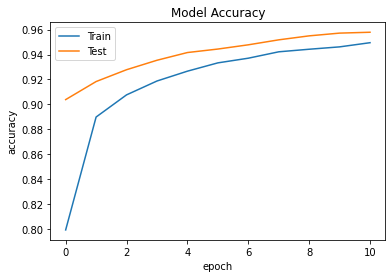

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

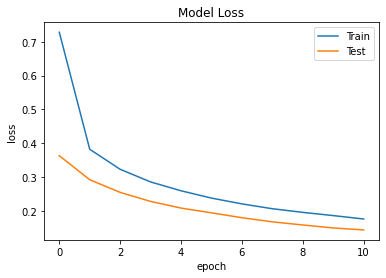

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()